#importing dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split



from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

#data collection

In [ ]:
#extracting zip file
import zipfile
zip_file_path = '/content/drive/MyDrive/dataset.zip'

extract_to_directory = '/content'
os.makedirs(extract_to_directory, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

In [ ]:
#getting subfolders path

normal_path = '/content/Brain_Data_Organised/Normal'
stroke_path = '/content/Brain_Data_Organised/Stroke'

In [ ]:
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)
print("Images in Normal Data:",len(normal_folder))
print("Images in Stroke Data:",len(stroke_folder))

Images in Normal Data: 1551
Images in Stroke Data: 950


#image data preprocessing

In [ ]:
data = []
# Resizing the Images

def resize_images(folder,path):
  for img_file in folder:
    image = Image.open(path + "/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

resize_images(normal_folder,normal_path)
resize_images(stroke_folder,stroke_path)

In [ ]:
len(data)

2501

In [ ]:
data[0].shape

(224, 224, 3)

changing labels

In [ ]:
normal_label = [0]*len(normal_folder)
stroke_label = [1]*len(stroke_folder)
Target_label = normal_label + stroke_label
len(Target_label)

2501

Converting Image data and target labels into array

In [ ]:
x = np.array(data)
y = np.array(Target_label)

Spliting The Data for training and testing purpose

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 224, 224, 3)
(251, 224, 224, 3)
(2250,)
(251,)


scale the data

In [ ]:
x_train_s = x_train/255
x_test_s = x_test/255

#Image Data Visualization

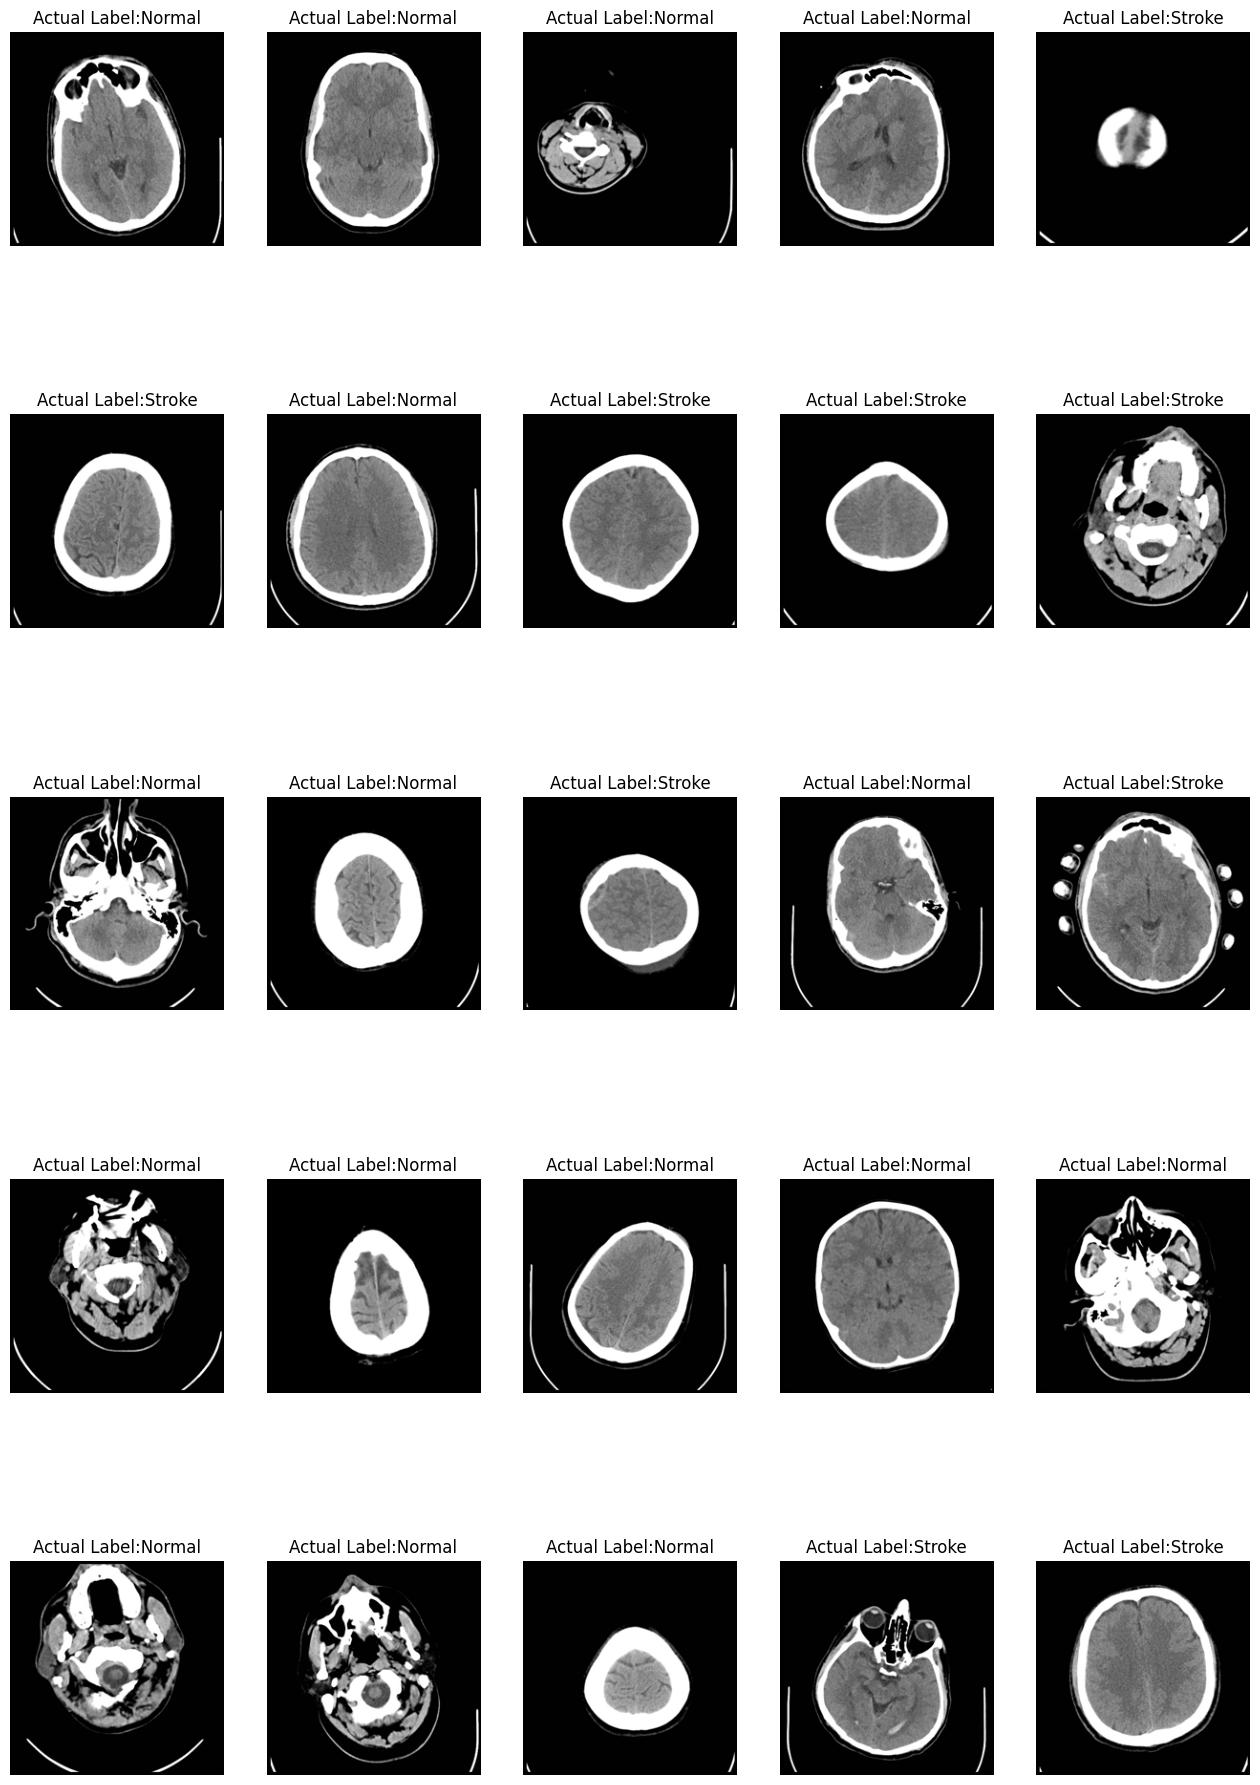

In [ ]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,24))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Actual Label:{class_labels[y_train[i]]}")
    plt.axis("off")
plt.show()

#CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(filters=100,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=80,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 100)       │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 100)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 80)        │          72,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 80)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          46,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │      21,632,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,004,525 (83.94 MB)

 Trainable params: 22,004,525 (83.94 MB)

 Non-trainable params: 0 (0.00 B)

#training the model

In [ ]:
history = model.fit(x_train_s,y_train,batch_size=32,
         epochs=10, validation_data=(x_test_s,y_test))

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 36s 345ms/step - accuracy: 0.5908 - loss: 0.6813 - val_accuracy: 0.7689 - val_loss: 0.4791
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - accuracy: 0.8167 - loss: 0.3741 - val_accuracy: 0.9243 - val_loss: 0.1926
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.9555 - loss: 0.1066 - val_accuracy: 0.9243 - val_loss: 0.1932
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9804 - loss: 0.0509 - val_accuracy: 0.9681 - val_loss: 0.0799
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9938 - loss: 0.0191 - val_accuracy: 0.9721 - val_loss: 0.0578
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9974 - loss: 0.0092 - val_accuracy: 0.9562 - val_loss: 0.1308
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.9932 - loss: 0.0248 - val_accuracy: 0.9681 - val_loss: 0.0829
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9921 - loss: 0.0201 - val_accuracy: 

#saving the model

In [ ]:
model.save('/content/drive/MyDrive/cnn_model.keras')

#model evaluation on test and train data

In [ ]:
loss, acc = model.evaluate(x_test_s,y_test)
print("Loss on Test Data:",loss)
print("Accuracy on Test Data:",acc)

loss, acc = model.evaluate(x_train_s,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9624 - loss: 0.1670
Loss on Test Data: 0.16105827689170837
Accuracy on Test Data: 0.9601593613624573
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9972 - loss: 0.0097
Loss on Train Data: 0.010185366496443748
Accuracy on Train Data: 0.9968888759613037


#Predictions on Test Image Data

In [ ]:
y_pred_test = model.predict(x_test_s)
y_pred_test_label = [1 if i>=0.5 else 0 for i in y_pred_test]

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


In [ ]:
print("Actual Label:",y_test[:10])
print("Predicted Label:",y_pred_test_label[:10])

Actual Label: [1 0 0 0 0 0 1 0 0 0]
Predicted Label: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0]


#Metrics Evaluation On Test Data

In [ ]:
print("-----Metrics Evaluation On Test Data -----")
print()
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_test_label))
print()
print("Classification Report:\n",classification_report(y_test,y_pred_test_label))

-----Metrics Evaluation On Test Data -----

Confusion Matrix:
 [[144   6]
 [  4  97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       150
           1       0.94      0.96      0.95       101

    accuracy                           0.96       251
   macro avg       0.96      0.96      0.96       251
weighted avg       0.96      0.96      0.96       251



#ROC curve

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

y_prob = model.predict(x_test_s)

fpr, tpr, threshold = roc_curve(y_test, y_prob)

# Compute ROC curve and ROC area
roc_auc = auc(fpr, tpr)
print(f"ROC - Area :{roc_auc}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
ROC - Area :1.0


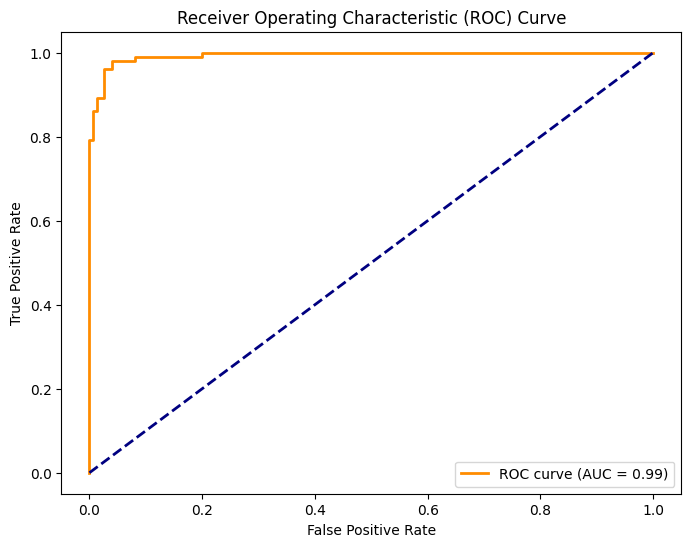

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#PR curve

In [ ]:
y_prob = model.predict(x_test_s)

precision, recall, threshold = precision_recall_curve(y_test, y_prob)

# Compute ROC curve and ROC area
pr_auc = auc(recall,precision)
print(f"PR - Area :{pr_auc}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
PR - Area :1.0


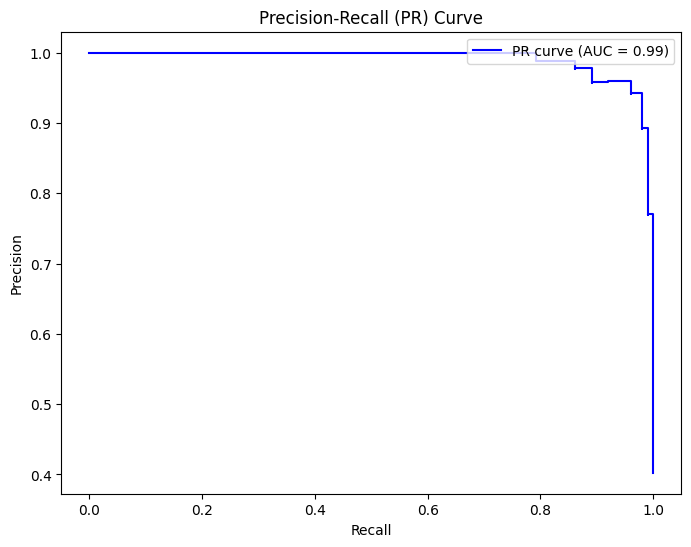

In [ ]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='upper right')
plt.show()

#image predictions with the dataset images

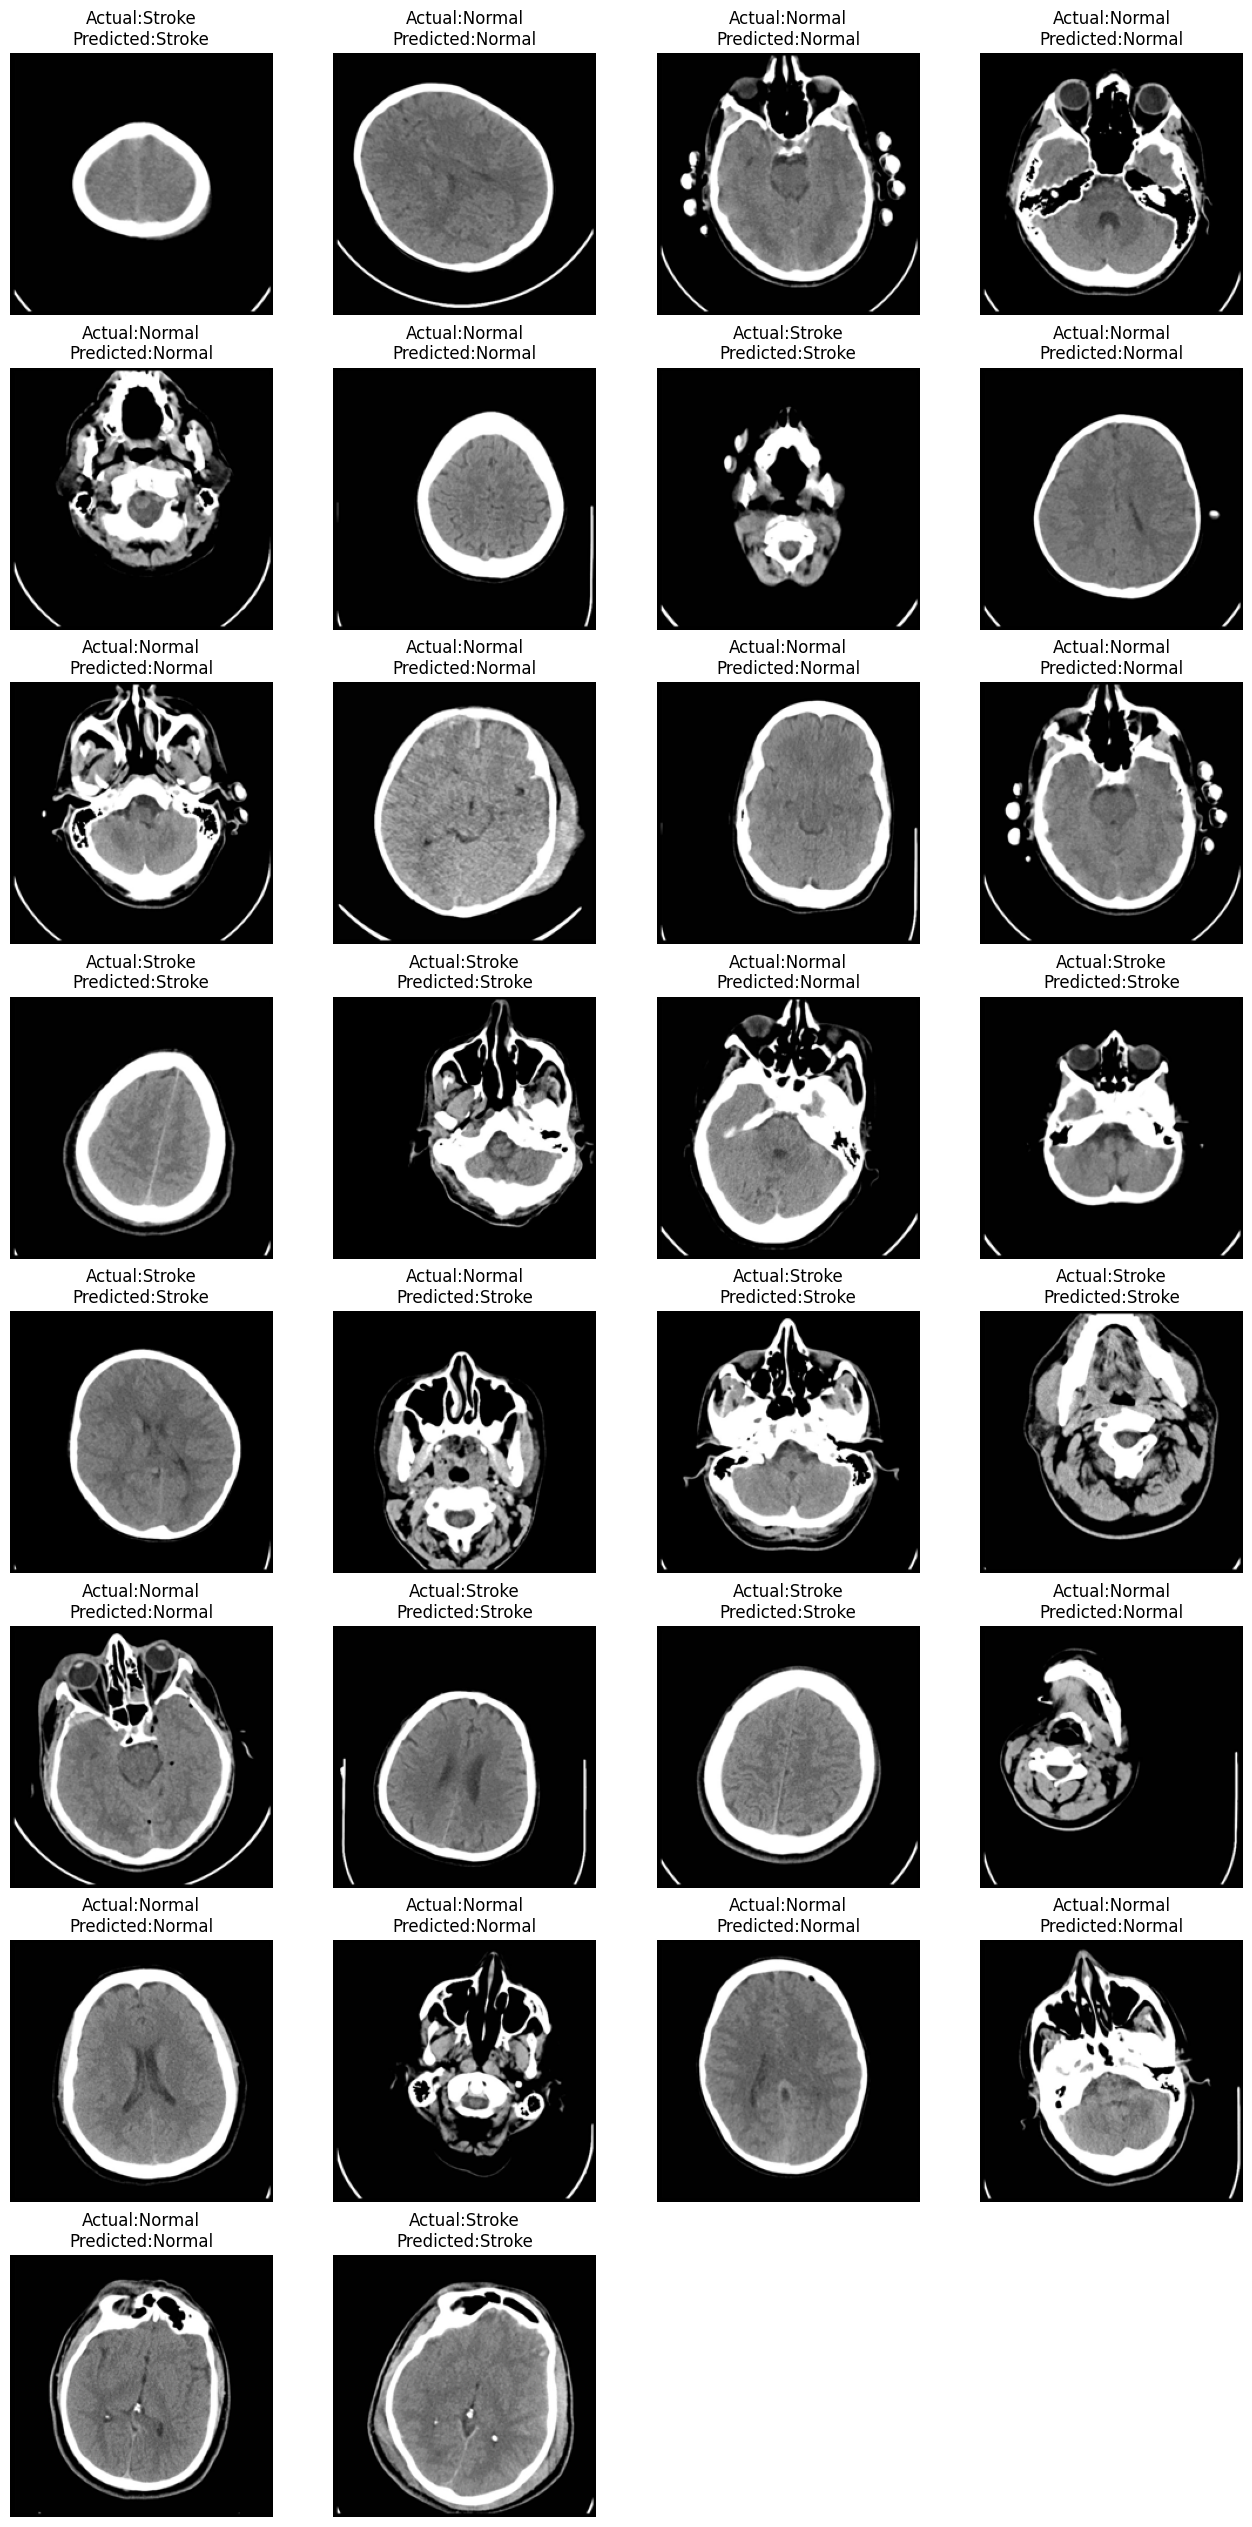

In [ ]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,32))
for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")

In [ ]:
from tensorflow.keras.models import load_model
model_path = '/content/drive/My Drive/cnn_model.keras'
model = load_model(model_path)

class_labels = ["Normal", "Stroke"]
def predict_image(img):
    try:
        img = img.resize((224, 224))
        img = img.convert('RGB')
        img = np.array(img)  # Convert the image to a numpy array
        img = np.expand_dims(img, axis=0)
        img = img / 255.0

        # Make the prediction
        prediction = model.predict(img)
        predicted_class = 1 if prediction >= 0.5 else 0

        return class_labels[predicted_class]
    except Exception as e:
        return f"Error: {e}"


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import io

upload = widgets.FileUpload(accept='image/*', multiple=False)
output = widgets.Output()

# Function to handle the file upload and display the prediction
def on_file_upload(change):
    output.clear_output()
    for name, file_info in upload.value.items():
        with output:
            # Convert the uploaded file content to a file-like object
            img = Image.open(io.BytesIO(file_info['content']))
            # Display the uploaded image
            display(img)
            # Make and display the prediction
            prediction = predict_image(img)
            print(f"Prediction: {prediction}")

upload.observe(on_file_upload, names='value')

# Display the widgets
display(upload, output)

FileUpload(value={}, accept='image/*', description='Upload')

Output()